In [16]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [19]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-59.08105872257124 159.81131242499242
13.98858443940226 -90.20386445745527
-22.412295671026328 29.184922922841224
67.362895657508 90.01795791841454
54.48048438595475 83.8356826156135
33.38983723971835 22.478518778044617
17.02213500639931 170.83553506396794
31.99666800300811 125.80743497086422
28.060074154893144 -103.64495833365976
-74.5667386801864 -37.303130377114826
61.17155042808872 126.20500053161487
-72.6114537514394 -147.72147353367927
-16.111896866198123 175.78163293830443
-87.5773628074225 -34.91020838259172
9.671532061617697 45.77992781079911
-39.70247679319439 -159.29816111591185
21.422060448033307 -123.50226998907951
-88.3349603781136 -14.63899024347063
79.75629577559803 -11.47685095452644
34.79914427425102 108.15923087727634
-36.61586999899569 -30.85490566344569
19.87499343764003 49.51821578825948
57.078887989472975 -124.9186794500181
-61.94695805221181 -140.19629914250402
-31.38411692200203 -38.70159195111833
-69.92655587114824 -117.36810300942159
79.68991365934443 -15.434

-62.97715430280783 110.04657150314887
-85.76815532736616 6.0881567979807585
41.02447349032079 92.30020547037338
-24.358726357944974 -90.56124072987096
15.312538914195088 -5.114178207214394
-37.81385657102677 -134.30701679504998
4.356228543870003 -64.64113682274075
-5.007038130710839 -0.34658105284557905
65.05502560978877 129.13979938317982
4.598755998901325 50.694818953347124
-18.33465739291657 65.79317034621539
-51.29504871852393 32.507661128916254
-89.2758684571163 48.58104830608872
59.69171004138818 85.3050833518538
11.948468666825718 2.094879793606765
-15.98553978650564 50.87479505110994
-0.2685754472608437 93.14050172030215
-32.404161056720895 -76.43265340235762
37.22113069871439 -45.07518929584734
69.83085194529158 -136.95241887765474
-78.23419571724641 -51.11038608638839
-89.31144897527747 27.631424461277646
4.94026714192465 -32.045487883813365
46.16874146507075 -160.31689574747347
30.328178118590216 106.02455094656102
36.43257075623809 97.75305702627696
-10.7557982541894 -70.77

In [20]:
from citipy import citipy

In [21]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [22]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [23]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39aed027b0b67abc289439e406a0ede4


In [24]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kununurra
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | rutland
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | schattdorf
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | lazaro cardenas
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | yulara
Processing Record 18 of Set 1 | cherskiy
Processing Record 19 of Set 1 | glendive
Processing Record 20 of Set 1 | saleaula
City not found. Skipping...
Processing Record 21 of Set 1 | ust-nera
Processing Record 22 of Set 1 | mataura
Processing Record 23 of Se

Processing Record 39 of Set 4 | ipanguacu
Processing Record 40 of Set 4 | chardara
Processing Record 41 of Set 4 | hilo
Processing Record 42 of Set 4 | amderma
City not found. Skipping...
Processing Record 43 of Set 4 | qabis
City not found. Skipping...
Processing Record 44 of Set 4 | vanimo
Processing Record 45 of Set 4 | maragogi
Processing Record 46 of Set 4 | chauk
Processing Record 47 of Set 4 | manati
Processing Record 48 of Set 4 | walvis bay
Processing Record 49 of Set 4 | shimoda
Processing Record 50 of Set 4 | half moon bay
Processing Record 1 of Set 5 | raudeberg
Processing Record 2 of Set 5 | peremyshlyany
Processing Record 3 of Set 5 | van
Processing Record 4 of Set 5 | alta floresta
Processing Record 5 of Set 5 | houma
Processing Record 6 of Set 5 | oranjemund
Processing Record 7 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 5 | avera
Processing Record 9 of Set 5 | wamba
Processing Record 10 of Set 5 | bathsheba
Processing Record

Processing Record 26 of Set 8 | damghan
Processing Record 27 of Set 8 | rungata
City not found. Skipping...
Processing Record 28 of Set 8 | mendahara
City not found. Skipping...
Processing Record 29 of Set 8 | amapa
Processing Record 30 of Set 8 | port augusta
Processing Record 31 of Set 8 | nishihara
Processing Record 32 of Set 8 | samusu
City not found. Skipping...
Processing Record 33 of Set 8 | dourbali
Processing Record 34 of Set 8 | labuhan
Processing Record 35 of Set 8 | ilam
Processing Record 36 of Set 8 | berdigestyakh
Processing Record 37 of Set 8 | cardston
Processing Record 38 of Set 8 | andenes
Processing Record 39 of Set 8 | along
Processing Record 40 of Set 8 | ridgecrest
Processing Record 41 of Set 8 | requena
Processing Record 42 of Set 8 | beterou
Processing Record 43 of Set 8 | cayenne
Processing Record 44 of Set 8 | sumkino
Processing Record 45 of Set 8 | saint-pierre
Processing Record 46 of Set 8 | anadyr
Processing Record 47 of Set 8 | kharp
Processing Record 48 o

Processing Record 17 of Set 12 | aksehir
Processing Record 18 of Set 12 | ler
Processing Record 19 of Set 12 | grafton
Processing Record 20 of Set 12 | batsfjord
Processing Record 21 of Set 12 | altamira
Processing Record 22 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 23 of Set 12 | nkowakowa
Processing Record 24 of Set 12 | champerico
Processing Record 25 of Set 12 | marystown
Processing Record 26 of Set 12 | rivera
Processing Record 27 of Set 12 | arrecife
Processing Record 28 of Set 12 | ajdabiya
Processing Record 29 of Set 12 | puerto cortes
City not found. Skipping...
Processing Record 30 of Set 12 | chimbote
Processing Record 31 of Set 12 | zverinogolovskoye
Processing Record 32 of Set 12 | harwich
Processing Record 33 of Set 12 | tshikapa
Processing Record 34 of Set 12 | san borja
Processing Record 35 of Set 12 | xichang
Processing Record 36 of Set 12 | skhisma
Processing Record 37 of Set 12 | svetlyy
Processing Record 38 of Set 12 | la palma
Processing 

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kununurra,-15.7667,128.7333,66.18,30,51,5.75,AU,2022-06-11 15:34:06
1,Bredasdorp,-34.5322,20.0403,72.16,28,100,2.13,ZA,2022-06-11 15:20:56
2,Ushuaia,-54.8000,-68.3000,38.86,93,20,10.36,AR,2022-06-11 15:34:07
3,Busselton,-33.6500,115.3333,61.25,84,20,8.88,AU,2022-06-11 15:34:07
4,Albany,42.6001,-73.9662,72.03,61,100,1.28,US,2022-06-11 15:30:40
5,Longyearbyen,78.2186,15.6401,39.04,81,75,10.36,SJ,2022-06-11 15:34:08
6,Rutland,43.6167,-73.0162,73.26,57,0,1.99,US,2022-06-11 15:34:08
7,Hithadhoo,-0.6000,73.0833,83.44,72,33,8.46,MV,2022-06-11 15:34:09
8,Tuktoyaktuk,69.4541,-133.0374,35.60,93,100,13.80,CA,2022-06-11 15:34:09
9,Saskylakh,71.9167,114.0833,54.32,53,30,13.09,RU,2022-06-11 15:34:09


In [30]:
new_column_order = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kununurra,51,AU,2022-06-11 15:34:06,30,-15.7667,128.7333,66.18,5.75
1,Bredasdorp,100,ZA,2022-06-11 15:20:56,28,-34.5322,20.0403,72.16,2.13
2,Ushuaia,20,AR,2022-06-11 15:34:07,93,-54.8000,-68.3000,38.86,10.36
3,Busselton,20,AU,2022-06-11 15:34:07,84,-33.6500,115.3333,61.25,8.88
4,Albany,100,US,2022-06-11 15:30:40,61,42.6001,-73.9662,72.03,1.28
...,...,...,...,...,...,...,...,...,...
549,Sassandra,100,CI,2022-06-11 15:49:26,91,4.9500,-6.0833,75.90,7.67
550,Troutdale,100,US,2022-06-11 15:49:27,96,45.5393,-122.3873,61.99,1.99
551,Klamath Falls,99,US,2022-06-11 15:49:27,64,42.2249,-121.7817,66.49,3.00
552,Kushima,100,JP,2022-06-11 15:49:27,93,31.4583,131.2333,65.55,4.32


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

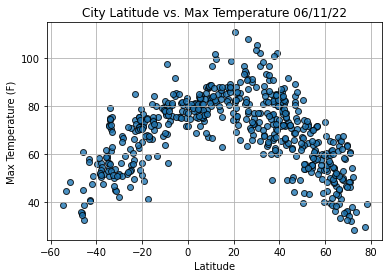

In [35]:
# Scatter plots for Latitude vs. Temperature

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

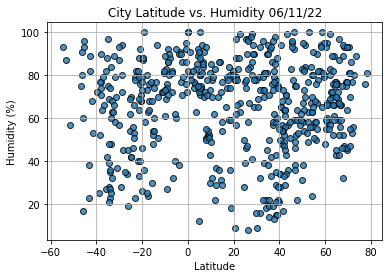

In [38]:
# Plot Latitude vs. Humidity

# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

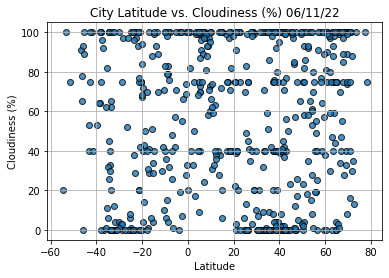

In [40]:
# Plot Latitude vs. Cloudiness

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

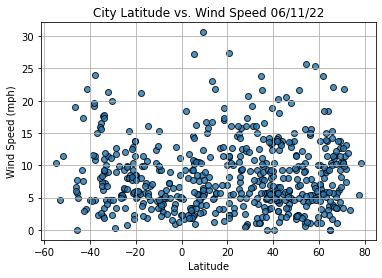

In [41]:
# Plot Latitude vs. Wind Speed

# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()